In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px

In [2]:
raw_path = '../input/brazilian-ecommerce/'
olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

In [3]:
datasets = [olist_customer, olist_geolocation, olist_orders, olist_order_items, olist_order_payments,
            olist_order_reviews, olist_products, olist_sellers]
names = ['olist_customer', 'olist_geolocation', 'olist_orders', 'olist_order_items', 'olist_order_payments',
         'olist_order_reviews', 'olist_products', 'olist_sellers']

data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

# I - Introdução

O comércio eletrônico está se tornando cada vez mais predominante em todo o mundo, e o Brasil não é exceção. Com o advento da internet e a facilidade de acesso aos dispositivos móveis, as compras online se tornaram uma parte essencial da vida cotidiana para muitos consumidores. No entanto, com o aumento da concorrência e a diversificação dos produtos e serviços oferecidos, as empresas enfrentam desafios significativos para garantir a satisfação do cliente, a eficiência operacional e o sucesso no mercado.

Os dados fornecidos pela Olist Store oferecem uma visão abrangente do cenário do comércio eletrônico no Brasil, abarcando informações detalhadas sobre mais de 100.000 pedidos realizados entre 2016 e 2018. A Olist atua como uma plataforma intermediária entre vendedores e sites de comércio online, proporcionando uma solução para aqueles que desejam vender produtos, mas enfrentam desafios na comercialização. Nesse contexto, os dados abrangem uma variedade de dimensões cruciais, incluindo o status do pedido, preços, desempenho de pagamentos e envio, localização dos clientes, atributos dos produtos e avaliações dos clientes. Essas informações são essenciais para compreender não apenas o funcionamento interno da plataforma da Olist, mas também para obter insights valiosos sobre o comportamento do consumidor, as tendências do mercado e as estratégias de negócios no setor de comércio eletrônico brasileiro.

O objetivo deste estudo é explorar os dados disponíveis para entender melhor os padrões de comportamento dos clientes, identificar fatores que influenciam a satisfação do cliente e investigar oportunidades de melhoria nos processos de negócios da Olist Store. Para atingir esse objetivo, várias técnicas analíticas serão empregadas, incluindo análise de texto, modelagem preditiva e análise de agrupamento.

No contexto deste projeto, será explorada a aplicação de técnicas de aprendizado de máquina para resolver problemas específicos, como predição de vendas futuras, análise de satisfação do cliente, perfil das caracteristicas mais valiosas e segmentação de clientes. Vários modelos serão implementados e testados, considerando diferentes critérios, como precisão, robustez e interpretabilidade.

# II - Trabalhos Relacionados

A Comparative Study of Machine Learning Models for Predicting Customer Satisfaction in E-commerce

Understanding Customer Behavior in E-commerce: A Predictive Analysis Approach

Customer Churn Prediction in E-commerce: A Machine Learning Approach

Product Recommendation System in E-commerce using Collaborative Filtering

Fraud Detection in E-commerce Transactions using Machine Learning

# III - Material e Métodos


## Apresentação do DataSet

### Fonte
Os dados foram obtidos a partir do [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data) e originam-se da Olist, o maior marketplace de departamentos do Brasil.

Fonte: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data

### Descrição Geral
- **Tamanho do DataSet**: São 7 datasets totalizando aproximadamente 126 MB de dados.
- **Data de Coleta**: Os dados foram coletados no período de 2016 a 2018.

### Número de Observações
- **Clientes**: 99.441
- **Geolocalização**: 40.262
- **Pedidos**: 100.000
- **Itens dos Pedidos**: 127.462
- **Pagamentos dos Pedidos**: 86.414
- **Avaliações dos Pedidos**: 84.952
- **Produtos**: 32.382
- **Vendedores**: 3.880

### Número de Atributos
- **Clientes**: 5
- **Geolocalização**: 5
- **Pedidos**: 8
- **Itens dos Pedidos**: 7
- **Pagamentos dos Pedidos**: 5
- **Avaliações dos Pedidos**: 6
- **Produtos**: 9
- **Vendedores**: 4

### Atributos/Features
#### Clientes
- **customer_id**: ID do cliente
- **customer_unique_id**: Identificador único do cliente
- **customer_zip_code_prefix**: Prefixo do CEP do cliente
- **customer_city**: Cidade do cliente
- **customer_state**: Estado do cliente

#### Geolocalização
- **geolocation_zip_code_prefix**: Prefixo do CEP
- **geolocation_lat**: Latitude
- **geolocation_lng**: Longitude
- **geolocation_city**: Cidade
- **geolocation_state**: Estado

#### Pedidos
- **order_id**: ID do pedido
- **customer_id**: ID do cliente
- **order_status**: Status do pedido
- **order_purchase_timestamp**: Timestamp da compra do pedido
- **order_approved_at**: Data de aprovação do pedido
- **order_delivered_carrier_date**: Data de entrega do pedido à transportadora
- **order_delivered_customer_date**: Data de entrega do pedido ao cliente
- **order_estimated_delivery_date**: Data estimada de entrega do pedido

#### Itens dos Pedidos
- **order_id**: ID do pedido
- **order_item_id**: ID do item do pedido
- **product_id**: ID do produto
- **seller_id**: ID do vendedor
- **shipping_limit_date**: Data limite de envio
- **price**: Preço
- **freight_value**: Valor do frete

#### Pagamentos dos Pedidos
- **order_id**: ID do pedido
- **payment_sequential**: Sequencial do pagamento
- **payment_type**: Tipo de pagamento
- **payment_installments**: Número de parcelas
- **payment_value**: Valor do pagamento

#### Avaliações dos Pedidos
- **review_id**: ID da avaliação
- **order_id**: ID do pedido
- **review_score**: Nota da avaliação
- **review_comment_title**: Título do comentário da avaliação
- **review_comment_message**: Mensagem do comentário da avaliação
- **review_creation_date**: Data de criação da avaliação
- **review_answer_timestamp**: Timestamp da resposta do vendedor (se houver)

#### Produtos
- **product_id**: ID do produto
- **product_category_name**: Nome da categoria do produto
- **product_name_length**: Tamanho do nome do produto
- **product_description_length**: Tamanho da descrição do produto
- **product_photos_qty**: Quantidade de fotos do produto
- **product_weight_g**: Peso do produto em gramas
- **product_length_cm**: Comprimento do produto em cm
- **product_height_cm**: Altura do produto em cm
- **product_width_cm**: Largura do produto em cm

#### Vendedores
- **seller_id**: ID do vendedor
- **seller_zip_code_prefix**: Prefixo do CEP do vendedor
- **seller_city**: Cidade do vendedor
- **seller_state**: Estado do vendedor

### Observações
- Este dataset proporciona uma oportunidade valiosa para explorar o mercado de e-commerce brasileiro.
- Pode ser utilizado para diversas finalidades, incluindo análise de dados, aprendizado de máquina e desenvolvimento de modelos preditivos.
- A variedade de atributos e o volume de dados disponíveis tornam este dataset um recurso valioso para pesquisadores e profissionais de dados.


![image.png](attachment:42b4059c-b21d-41c3-b588-be9bb9747edb.png)

In [4]:
for dataset, name in zip(datasets, names):
    print(f"DataFrame: {name}\nColunas:{np.array(dataset.columns)}\n")

DataFrame: olist_customer
Colunas:['customer_id' 'customer_unique_id' 'customer_zip_code_prefix'
 'customer_city' 'customer_state']

DataFrame: olist_geolocation
Colunas:['geolocation_zip_code_prefix' 'geolocation_lat' 'geolocation_lng'
 'geolocation_city' 'geolocation_state']

DataFrame: olist_orders
Colunas:['order_id' 'customer_id' 'order_status' 'order_purchase_timestamp'
 'order_approved_at' 'order_delivered_carrier_date'
 'order_delivered_customer_date' 'order_estimated_delivery_date']

DataFrame: olist_order_items
Colunas:['order_id' 'order_item_id' 'product_id' 'seller_id' 'shipping_limit_date'
 'price' 'freight_value']

DataFrame: olist_order_payments
Colunas:['order_id' 'payment_sequential' 'payment_type' 'payment_installments'
 'payment_value']

DataFrame: olist_order_reviews
Colunas:['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']

DataFrame: olist_products
Colunas:['product_id' 'produc

In [5]:
olist_customer.head(1)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   

   customer_zip_code_prefix customer_city customer_state  
0                     14409        franca             SP

In [6]:
olist_geolocation.head(1)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   

  geolocation_city geolocation_state  
0        sao paulo                SP

In [7]:
olist_orders.head(1)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00

In [8]:
olist_order_items.head(1)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29

In [9]:
olist_order_payments.head(1)

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33

In [10]:
olist_order_reviews.head(1)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   

   review_score review_comment_title review_comment_message  \
0             4                  NaN                    NaN   

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00     2018-01-18 21:46:59

In [11]:
olist_products.head(1)

product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0

In [12]:
olist_sellers.head(1)

seller_id  seller_zip_code_prefix seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   

  seller_state  
0           SP

In [13]:
data_info.style.background_gradient()

In [14]:
# Verificar valores nulos em 'review_comment_title' e 'review_comment_message'
null_title = olist_order_reviews['review_comment_title'].isnull().sum()
null_message = olist_order_reviews['review_comment_message'].isnull().sum()

print("Valores nulos em 'review_comment_title':", null_title)
print("Valores nulos em 'review_comment_message':", null_message)

Valores nulos em 'review_comment_title': 87656
Valores nulos em 'review_comment_message': 58247


## Ideias iniciais

- **Impacto da localização do cliente na satisfação e no tempo de entrega:**

*Hipótese:*
Clientes em certas regiões geográficas podem estar mais satisfeitos com seus pedidos devido a tempos de entrega mais curtos ou melhores serviços de entrega.

*Metodologia:*
Comparação a satisfação do cliente e os tempos de entrega em diferentes regiões usando análises descritivas e testes estatísticos.

- **Efeito do tipo de produto na satisfação do cliente:**

*Hipótese:*
Certos tipos de produtos podem gerar mais insatisfação ou satisfação entre os clientes.

*Metodologia:*
Analise das avaliações dos clientes e classifique os produtos em categorias. Compare a satisfação do cliente entre diferentes categorias de produtos.

- **Predição de vendas futuras:**

*Hipótese:*
É possível prever as vendas futuras com base em dados históricos de vendas.

*Metodologia:*
Uso de técnicas de ML para prever as vendas futuras com base nos dados de vendas anteriores.

- **Análise de agrupamento de clientes:**

*Hipótese:*
Os clientes podem ser agrupados com base em seu comportamento de compra e satisfação.

*Metodologia:*
Aplicação técnicas de análise de clustering nos dados dos clientes para identificar grupos distintos com características semelhantes.

- **Desempenho do processo de entrega:**

*Hipótese:*
O desempenho da entrega pode afetar a satisfação do cliente e as taxas de retorno.

*Metodologia:* Analise dos dados de entrega para identificar padrões de desempenho, como tempos médios de entrega, taxas de entrega bem-sucedidas e problemas de entrega.

- **Perfil de features com maior satisfação do cliente:**

*Hipótese:*
Características derivadas dos dados podem ser úteis na previsão da satisfação do cliente.

*Metodologia:*
Uso de modelos de Machine Learning e EDA para montar o perfil de quais características aumentam a satisfação do cliente

## B) Exploração e Pré-processamento


olist_orders:

Para as colunas 'order_approved_at', 'order_delivered_carrier_date' e 'order_delivered_customer_date', você pode preencher os valores nulos com a mediana ou a média dos dados existentes, dependendo da distribuição dos dados e da importância das colunas para sua análise. Isso pode ser feito usando técnicas de imputação, como a função fillna() do pandas.

olist_order_reviews:

Para as colunas 'review_comment_title' e 'review_comment_message', você pode preencher os valores nulos com uma string vazia ou algum valor padrão que represente a ausência de um comentário. Isso pode ser feito usando a função fillna() do pandas.
olist_products:

Para as colunas 'product_category_name', 'product_name_length', 'product_description_length', 'product_photos_qty' e 'product_weight_g', você pode preencher os valores nulos com a mediana ou a média dos dados existentes, dependendo da distribuição dos dados e da importância das colunas para sua análise. Isso pode ser feito usando técnicas de imputação, como a função fillna() do pandas.

### Pré Processamento

In [15]:
olist_orders['order_approved_at'] = pd.to_datetime(olist_orders['order_approved_at'])
# olist_orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)
olist_orders['order_delivered_customer_date'] = pd.to_datetime(olist_orders['order_delivered_customer_date'])
olist_orders['order_estimated_delivery_date'] = pd.to_datetime(olist_orders['order_estimated_delivery_date'])
olist_orders["order_purchase_timestamp"] = pd.to_datetime(olist_orders['order_purchase_timestamp'])


Aqui estamos transformando as colunas de data em data-hora, pois não queremos que seja do tipo objeto

In [16]:
# Dropando nulos na mesnagem

# Verificar valores nulos em 'review_comment_title' e 'review_comment_message'
null_title = olist_order_reviews['review_comment_title'].isnull().sum()
null_message = olist_order_reviews['review_comment_message'].isnull().sum()

print("Valores nulos em 'review_comment_title':", null_title)
print("Valores nulos em 'review_comment_message':", null_message)

Valores nulos em 'review_comment_title': 87656
Valores nulos em 'review_comment_message': 58247


Não é interessante as reviews que não possuem comentários, portanto vamos dropa-las.

### Data Maxima e Minima das Vendas

In [17]:
# Encontrando a data máxima e mínima
data_minima = olist_orders['order_delivered_customer_date'].min()
data_maxima = olist_orders['order_delivered_customer_date'].max()

print("Data mínima:", data_minima)
print("Data máxima:", data_maxima)

Data mínima: 2016-10-11 13:46:32
Data máxima: 2018-10-17 13:22:46


In [18]:
olist_orders["ship-time"] = (olist_orders['order_delivered_customer_date'] -  olist_orders['order_purchase_timestamp']).dt.days

entrega_minima = olist_orders['ship-time'].min()
entrega_maxima = olist_orders['ship-time'].max()

print("Menor tempo de entrega desde o pedido:", entrega_minima)
print("Maior tempo de entrega desde o pedido:", entrega_maxima)

Menor tempo de entrega desde o pedido: 0.0
Maior tempo de entrega desde o pedido: 209.0


In [19]:
import plotly.express as px

fig = px.histogram(olist_orders, x='ship-time', title="Diferença do pedido para o dia da entrega")
fig.show()

In [20]:
olist_orders["delay-time"] = (olist_orders['order_delivered_customer_date'] -  olist_orders['order_estimated_delivery_date']).dt.days

atraso_minimo = olist_orders['delay-time'].min()
atraso_maximo = olist_orders['delay-time'].max()

print("Menor atraso:", atraso_minimo)
print("Maior atraso:", atraso_maximo)
print("Atraso médio:", olist_orders['delay-time'].mean())
print("Atraso mediano:", olist_orders["delay-time"].median())

fig = px.histogram(olist_orders, x='delay-time', title="Diferença entre a entrega e o tempo estimado")
fig.show()

Menor atraso: -147.0
Maior atraso: 188.0
Atraso médio: -11.876881296902857
Atraso mediano: -12.0


In [21]:
olist_orders["approval_time"] = (olist_orders['order_approved_at'] -  olist_orders['order_purchase_timestamp']).dt.days


print("Tempo mínimo do pedido até a aprovação:", olist_orders['approval_time'].min())
print("Tempo máximo do pedido até a aprovação:", olist_orders['approval_time'].max())
print("Tempo médio do pedido até a aprovação:", olist_orders['approval_time'].mean())
print("Tempo mediano do pedido até a aprovação:", olist_orders["approval_time"].median())

fig = px.histogram(olist_orders, x='approval_time', title="Tempo do pedido até a aprovação")
fig.show()

Tempo mínimo do pedido até a aprovação: 0.0
Tempo máximo do pedido até a aprovação: 187.0
Tempo médio do pedido até a aprovação: 0.2697998610005943
Tempo mediano do pedido até a aprovação: 0.0


In [22]:
olist_orders["recency"] = olist_orders["order_purchase_timestamp"] - olist_orders["order_purchase_timestamp"].max()
olist_orders['recency'] = olist_orders['recency'].dt.days

## Distância

In [23]:
merged_df = pd.merge(olist_order_reviews, olist_orders[['order_id', 'customer_id']], on='order_id', how='left')

merged_df = pd.merge(olist_customer, olist_orders[['order_id', 'customer_id']], on='customer_id', how='left')
merged_df = pd.merge(merged_df, olist_order_items[['order_id', 'seller_id']], on='order_id', how='left')
merged_df = pd.merge(merged_df, olist_sellers, on='seller_id', how='left')
merged_df = merged_df.drop(columns=['customer_id', 'customer_unique_id', "customer_city", "customer_state", "seller_id", "seller_city", "seller_state"])
merged_df.dropna(inplace=True)

print(list(merged_df.columns))
merged_df

['customer_zip_code_prefix', 'order_id', 'seller_zip_code_prefix']


customer_zip_code_prefix                          order_id  \
0                          14409  00e7ee1b050b8499577073aeb2a297a1   
1                           9790  29150127e6685892b6eab3eec79f59c7   
2                           1151  b2059ed67ce144a36e2aa97d2c9e9ad2   
3                           8775  951670f92359f4fe4a63112aa7306eba   
4                          13056  6b7d50bd145f6fc7f33cebabd7e49d0f   
...                          ...                               ...   
113420                      3937  6760e20addcf0121e9d58f2f1ff14298   
113421                      6764  9ec0c8947d973db4f4e8dcf1fbfa8f1b   
113422                     60115  fed4434add09a6f332ea398efd656a5c   
113423                     92120  e31ec91cea1ecf97797787471f98a8c2   
113424                      6703  28db69209a75e59f20ccbb5c36a20b90   

        seller_zip_code_prefix  
0                       8577.0  
1                      88303.0  
2                       8577.0  
3                       8577.0  
4                      14940.0  
...                        ...  
113420                 17400.0  
113421                 14802.0  
113422                  3304.0  
113423                 14840.0  
113424                  3804.0  

[112650 rows x 3 columns]

In [24]:
import math
def haversine(lat1, lon1, lat2, lon2):
    # Raio da Terra em km
    R = 6371.0

    # Convertendo latitude e longitude de graus para radianos
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    # Aplicando a fórmula do haversine
    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2.0) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Calculando a distância
    distancia = R * c  # Distância em km
    return distancia

In [25]:
geolocalizacao = olist_geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])

In [26]:
merged_df = merged_df.merge(geolocalizacao[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
                            left_on='customer_zip_code_prefix',
                            right_on='geolocation_zip_code_prefix',
                            how='inner')
merged_df = merged_df.rename(columns={'geolocation_lat': 'cust_lat', 'geolocation_lng': 'cust_lng'})
merged_df

customer_zip_code_prefix                          order_id  \
0                          14409  00e7ee1b050b8499577073aeb2a297a1   
1                          14409  95261f608a64bbbe760a212b4d48a4ee   
2                          14409  9444fa2ab50a3f5af63b48be297eda24   
3                          14409  dceb8e88274c6f42a88a76ed979eb817   
4                          14409  6ee1cea1b2edcc713f83ebfbccbc57f9   
...                          ...                               ...   
112343                     87145  e12f5458c6b4f349a97fbf22e08d17ac   
112344                     98860  82a11e82ea02c7e3381366e935c1126e   
112345                      5538  6e9f8d6156d8c37f0e0e6351908de639   
112346                     74980  e65fa5f31ce4436d38bcf5e109fd43e4   
112347                     99043  ab042583eff2cb1ffe2110a95da95d4b   

        seller_zip_code_prefix  geolocation_zip_code_prefix   cust_lat  \
0                       8577.0                        14409 -20.509897   
1                      14940.0                        14409 -20.509897   
2                      89204.0                        14409 -20.509897   
3                       4243.0                        14409 -20.509897   
4                       1212.0                        14409 -20.509897   
...                        ...                          ...        ...   
112343                 16301.0                        87145 -23.501992   
112344                 91360.0                        98860 -28.525792   
112345                 14940.0                         5538 -23.588504   
112346                  3204.0                        74980 -16.823261   
112347                  3426.0                        99043 -28.226596   

         cust_lng  
0      -47.397866  
1      -47.397866  
2      -47.397866  
3      -47.397866  
4      -47.397866  
...           ...  
112343 -52.150755  
112344 -54.145061  
112345 -46.737870  
112346 -49.247368  
112347 -52.467505  

[112348 rows x 6 columns]

In [27]:
merged_df = merged_df.merge(geolocalizacao[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
                            left_on='seller_zip_code_prefix',
                            right_on='geolocation_zip_code_prefix',
                            how='right')
merged_df = merged_df.rename(columns={'geolocation_lat': 'sell_lat', 'geolocation_lng': 'sell_lng'})
merged_df = merged_df.drop(columns = ["customer_zip_code_prefix", "seller_zip_code_prefix", "geolocation_zip_code_prefix_x", "geolocation_zip_code_prefix_y"])
merged_df = merged_df.dropna()

merged_df

order_id   cust_lat   cust_lng   sell_lat  \
2       19a446583991325bc207214763eea124 -23.434352 -46.542897 -23.544392   
3       b75ec2d4ba9e40634c65c4b6be946b6c -15.820763 -47.901087 -23.544392   
4       bd538b23115ef07a07199e3e2bdc2d4d -30.032150 -51.232552 -23.541578   
5       aed8573ac2c1e7bdccb04472bbeaec39 -22.976619 -47.010715 -23.541578   
6       aed8573ac2c1e7bdccb04472bbeaec39 -22.976619 -47.010715 -23.541578   
...                                  ...        ...        ...        ...   
128834  862cca64868df4c3a3f0058a93aef465 -19.954557 -43.934100 -27.729373   
128835  1676852853bb81a2a74bceb23c87ea44 -23.632217 -46.567111 -27.729373   
128836  ffebd80e3291e811c308365936897efd -22.082361 -41.865673 -27.729373   
128837  3e290444f5680a0f8a95b7d87980a358 -22.911017 -47.096141 -27.729373   
128838  3ad3f75989908136712eba79927a805c -23.454348 -46.521912 -27.729373   

         sell_lng  
2      -46.639499  
3      -46.639499  
4      -46.641607  
5      -46.641607  
6      -46.641607  
...           ...  
128834 -52.537491  
128835 -52.537491  
128836 -52.537491  
128837 -52.537491  
128838 -52.537491  

[112096 rows x 5 columns]

In [28]:
merged_df['dis'] = merged_df.apply(lambda row: haversine(row['cust_lat'], row['cust_lng'], row['sell_lat'], row['sell_lng']), axis=1)

In [ ]:
olist_orders = olist_orders.merge(merged_df[['order_id', 'dis']], on='order_id', how='right')
del merged_df

In [ ]:
olist_orders

order_id                       customer_id  \
0       19a446583991325bc207214763eea124  f3a2d5b49cc090c679649818bc3f8e8e   
1       b75ec2d4ba9e40634c65c4b6be946b6c  b84999d47cecf126835a23650ee4ecb8   
2       bd538b23115ef07a07199e3e2bdc2d4d  5ea6e9b6942f579e279a530dcb100be5   
3       aed8573ac2c1e7bdccb04472bbeaec39  30e44634f95a0c8423585cddd8d89c12   
4       aed8573ac2c1e7bdccb04472bbeaec39  30e44634f95a0c8423585cddd8d89c12   
...                                  ...                               ...   
112091  862cca64868df4c3a3f0058a93aef465  58f2a48696b2cf8da50fcb21f8512c14   
112092  1676852853bb81a2a74bceb23c87ea44  7d0ff11552c535ce8179ab49b5f0838b   
112093  ffebd80e3291e811c308365936897efd  050309b91cc5e04e68841938e7984aaf   
112094  3e290444f5680a0f8a95b7d87980a358  f072965e658fe6c9591cc88d5b6cd9fe   
112095  3ad3f75989908136712eba79927a805c  454e6236785cc7789bcdb331e7499c4b   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2018-06-11 22:31:34 2018-06-11 22:59:15   
1         delivered      2018-08-19 20:04:58 2018-08-20 14:53:37   
2         delivered      2018-07-15 12:57:22 2018-07-17 07:31:34   
3         delivered      2018-03-27 14:30:53 2018-03-27 14:47:55   
4         delivered      2018-03-27 14:30:53 2018-03-27 14:47:55   
...             ...                      ...                 ...   
112091    delivered      2018-04-19 09:43:15 2018-04-24 18:14:28   
112092    delivered      2018-04-21 17:56:07 2018-04-24 19:23:51   
112093    delivered      2018-07-13 20:04:05 2018-07-13 20:23:55   
112094    delivered      2018-04-15 20:44:23 2018-04-15 20:55:36   
112095    delivered      2018-07-23 15:59:52 2018-07-23 16:46:02   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2018-06-12 10:35:00           2018-06-13 19:38:50   
1               2018-08-21 10:39:00           2018-08-29 19:18:24   
2               2018-07-17 10:24:00           2018-07-24 16:41:46   
3               2018-03-29 19:21:51           2018-04-02 17:28:30   
4               2018-03-29 19:21:51           2018-04-02 17:28:30   
...                             ...                           ...   
112091          2018-04-23 19:32:56           2018-04-26 16:46:37   
112092          2018-04-23 19:32:56           2018-05-03 20:19:18   
112093          2018-07-17 10:03:00           2018-07-23 19:44:45   
112094          2018-04-18 17:04:33           2018-04-26 15:44:25   
112095          2018-07-24 10:52:00           2018-07-30 17:09:05   

       order_estimated_delivery_date  ship-time  delay-time  approval_time  \
0                         2018-07-05        1.0       -22.0            0.0   
1                         2018-09-05        9.0        -7.0            0.0   
2                         2018-08-07        9.0       -14.0            1.0   
3                         2018-04-09        6.0        -7.0            0.0   
4                         2018-04-09        6.0        -7.0            0.0   
...                              ...        ...         ...            ...   
112091                    2018-05-18        7.0       -22.0            5.0   
112092                    2018-05-22       12.0       -19.0            3.0   
112093                    2018-08-07        9.0       -15.0            0.0   
112094                    2018-05-16       10.0       -20.0            0.0   
112095                    2018-08-20        7.0       -21.0            0.0   

        recency          dis  
0          -128    15.708919  
1           -59   868.905182  
2           -95   853.307420  
3          -205    73.268309  
4          -205    73.268309  
...         ...          ...  
112091     -182  1229.206052  
112092     -179   751.797277  
112093      -96  1245.211075  
112094     -185   765.406429  
112095      -87   767.831689  

[112096 rows x 13 columns]

In [ ]:
fig = px.histogram(olist_orders, x='dis', title="Distâncias do comprador ao vendedor")
fig.show()

In [ ]:
olist_order_reviews["score"] = olist_order_reviews["review_score"].apply(lambda x: 0 if x <= 3 else 1)


In [ ]:
fig = px.histogram(olist_order_reviews, x='score')
fig.show()

In [ ]:
pedidos = olist_orders.merge(olist_order_reviews[['order_id', 'score']], on='order_id', how='left')
pedidos

order_id                       customer_id  \
0       19a446583991325bc207214763eea124  f3a2d5b49cc090c679649818bc3f8e8e   
1       b75ec2d4ba9e40634c65c4b6be946b6c  b84999d47cecf126835a23650ee4ecb8   
2       bd538b23115ef07a07199e3e2bdc2d4d  5ea6e9b6942f579e279a530dcb100be5   
3       aed8573ac2c1e7bdccb04472bbeaec39  30e44634f95a0c8423585cddd8d89c12   
4       aed8573ac2c1e7bdccb04472bbeaec39  30e44634f95a0c8423585cddd8d89c12   
...                                  ...                               ...   
112746  862cca64868df4c3a3f0058a93aef465  58f2a48696b2cf8da50fcb21f8512c14   
112747  1676852853bb81a2a74bceb23c87ea44  7d0ff11552c535ce8179ab49b5f0838b   
112748  ffebd80e3291e811c308365936897efd  050309b91cc5e04e68841938e7984aaf   
112749  3e290444f5680a0f8a95b7d87980a358  f072965e658fe6c9591cc88d5b6cd9fe   
112750  3ad3f75989908136712eba79927a805c  454e6236785cc7789bcdb331e7499c4b   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2018-06-11 22:31:34 2018-06-11 22:59:15   
1         delivered      2018-08-19 20:04:58 2018-08-20 14:53:37   
2         delivered      2018-07-15 12:57:22 2018-07-17 07:31:34   
3         delivered      2018-03-27 14:30:53 2018-03-27 14:47:55   
4         delivered      2018-03-27 14:30:53 2018-03-27 14:47:55   
...             ...                      ...                 ...   
112746    delivered      2018-04-19 09:43:15 2018-04-24 18:14:28   
112747    delivered      2018-04-21 17:56:07 2018-04-24 19:23:51   
112748    delivered      2018-07-13 20:04:05 2018-07-13 20:23:55   
112749    delivered      2018-04-15 20:44:23 2018-04-15 20:55:36   
112750    delivered      2018-07-23 15:59:52 2018-07-23 16:46:02   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2018-06-12 10:35:00           2018-06-13 19:38:50   
1               2018-08-21 10:39:00           2018-08-29 19:18:24   
2               2018-07-17 10:24:00           2018-07-24 16:41:46   
3               2018-03-29 19:21:51           2018-04-02 17:28:30   
4               2018-03-29 19:21:51           2018-04-02 17:28:30   
...                             ...                           ...   
112746          2018-04-23 19:32:56           2018-04-26 16:46:37   
112747          2018-04-23 19:32:56           2018-05-03 20:19:18   
112748          2018-07-17 10:03:00           2018-07-23 19:44:45   
112749          2018-04-18 17:04:33           2018-04-26 15:44:25   
112750          2018-07-24 10:52:00           2018-07-30 17:09:05   

       order_estimated_delivery_date  ship-time  delay-time  approval_time  \
0                         2018-07-05        1.0       -22.0            0.0   
1                         2018-09-05        9.0        -7.0            0.0   
2                         2018-08-07        9.0       -14.0            1.0   
3                         2018-04-09        6.0        -7.0            0.0   
4                         2018-04-09        6.0        -7.0            0.0   
...                              ...        ...         ...            ...   
112746                    2018-05-18        7.0       -22.0            5.0   
112747                    2018-05-22       12.0       -19.0            3.0   
112748                    2018-08-07        9.0       -15.0            0.0   
112749                    2018-05-16       10.0       -20.0            0.0   
112750                    2018-08-20        7.0       -21.0            0.0   

        recency          dis  score  
0          -128    15.708919    1.0  
1           -59   868.905182    1.0  
2           -95   853.307420    1.0  
3          -205    73.268309    1.0  
4          -205    73.268309    1.0  
...         ...          ...    ...  
112746     -182  1229.206052    0.0  
112747     -179   751.797277    1.0  
112748      -96  1245.211075    1.0  
112749     -185   765.406429    1.0  
112750      -87   767.831689    1.0  

[112751 rows x 14 columns]

### Localizando os clientes

In [ ]:
import plotly.express as px

fig1 = px.bar(x=olist_customer['customer_city'].value_counts()[:50].index,
              y=olist_customer['customer_city'].value_counts()[:50].values,
              labels={'x': 'Cidade', 'y': 'Frequência'},
              title='Frequência de Clientes nas top 50 Cidades')
fig1.show()

Claramanete a maioria dos clientes está na cidade de São Paulo e Rio de Janeiro, e percebe-se a presença de uma cauda longa, com poucos clientes nas outras cidades.

In [ ]:
fig2 = px.bar(x=olist_customer['customer_state'].value_counts().index,
              y=olist_customer['customer_state'].value_counts().values,
              labels={'x': 'Estado', 'y': 'Frequência'},
              title='Frequência de Clientes por Estado')
fig2.show()

Aqui explicitamos que os principais estados dos cliente são SP, RJ e MG.

In [ ]:
import plotly.express as px

# Fundir os DataFrames 'olist_order_reviews' e 'olist_orders' para obter o estado do cliente
merged_df = pd.merge(olist_order_reviews, olist_orders[['order_id', 'customer_id']], on='order_id', how='left')
merged_df = pd.merge(merged_df, olist_customer[['customer_id', 'customer_state']], on='customer_id', how='left')

# Calcular a média de satisfação do cliente por estado
satisfaction_by_state = merged_df.groupby('customer_state')['score'].mean().reset_index()

# Ordenar o DataFrame pela média de satisfação do cliente
satisfaction_by_state = satisfaction_by_state.sort_values(by='score', ascending=False)

# Criar o gráfico de barras ordenado
fig_satisfaction_by_state = px.bar(satisfaction_by_state, x='customer_state', y='score',
                                   title='Média de Satisfação do Cliente por Estado')

# Mostrar o gráfico
fig_satisfaction_by_state.show()

Aparentemente, clientes do Norte e Nordestes tendem a ser mais satisfeitos com os produtos que recebem, apesar de pedirem menos produtos.

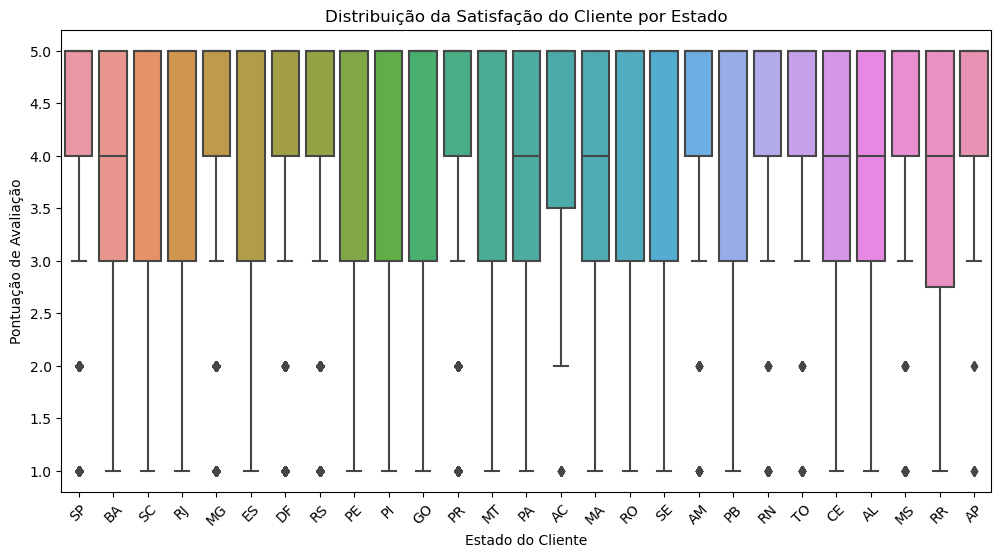

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='customer_state', y='review_score')
plt.title('Distribuição da Satisfação do Cliente por Estado')
plt.xlabel('Estado do Cliente')
plt.ylabel('Pontuação de Avaliação')
plt.xticks(rotation=45)
plt.show()

São mais comuns as reviews com nota 5 e nota 1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


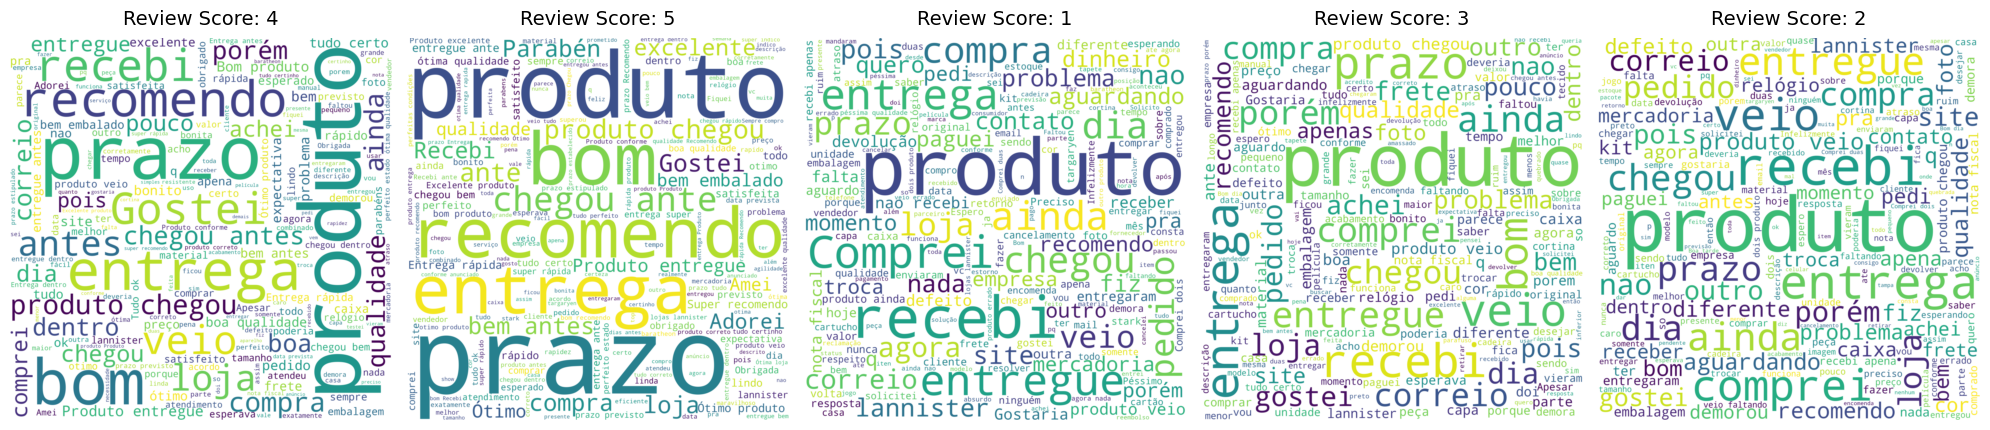

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download the stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

def wordcloud_draw_subplot(ax, dataset, title, color='white'):
    # Convert all entries in the dataset to strings
    dataset = dataset.dropna().astype(str)
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords=stop_words, background_color=color, width=2500, height=2500).generate(cleaned_word)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(title, fontsize=14, pad=10)

# Assuming `olist_order_reviews` is your DataFrame
unique_scores = olist_order_reviews['review_score'].unique()
fig, axs = plt.subplots(1, len(unique_scores), figsize=(20, 5))

for i, score in enumerate(unique_scores):
    wordcloud_draw_subplot(axs[i], olist_order_reviews.loc[olist_order_reviews['review_score'] == score, 'review_comment_message'], f"Review Score: {score}")

plt.tight_layout()
plt.show()

Percebe-se a predominância de palavras negativas, como "defeito" ou "péssimo" nas reviews de menor valor, e palavras positivas como "bom" e "gostei nas reviews de maior valor. Isso sugere que talvez seja interessante fazer uma análise de emoção nos textos, para ver se conseguimos prever com sucesso.

## C) Balanceamento e padronização da base

In [ ]:
merged_df = pd.merge(olist_order_reviews, olist_orders, on='order_id')
merged_df = pd.merge(merged_df, olist_customer, on='customer_id')
merged_df = pd.merge(merged_df, olist_order_items, on='order_id')
merged_df = pd.merge(merged_df, olist_order_payments, on='order_id')
merged_df = pd.merge(merged_df, olist_products, on='product_id')
merged_df = pd.merge(merged_df, olist_sellers, on='seller_id')
merged_df = pd.merge(merged_df, olist_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
merged_df = merged_df.drop(columns=['geolocation_city','geolocation_lat', 'geolocation_lng', 'geolocation_state',
                                    'review_comment_message','review_comment_title','customer_zip_code_prefix',
                                    'order_item_id', 'customer_unique_id', 'review_id','geolocation_zip_code_prefix',
                                    'seller_zip_code_prefix', 'customer_id', 'order_id', 'seller_id', 'product_id'])

# Liberando memoria
del olist_order_reviews
del olist_orders
del olist_customer
del olist_order_items
del olist_order_payments
del olist_products
del olist_sellers
del olist_geolocation

In [ ]:
# Extraindo quantos dia a entrega levou
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])
merged_df['order_approved_at'] = pd.to_datetime(merged_df['order_approved_at'])
merged_df['order_delivered_carrier_date'] = pd.to_datetime(merged_df['order_delivered_carrier_date'])
merged_df['delivery_time'] = (merged_df['order_delivered_carrier_date'] - merged_df['order_approved_at']).dt.days

# Drop de colunas nao usadas
extra_columns = ['order_estimated_delivery_date', 'order_purchase_timestamp', 'order_approved_at',
                'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_creation_date',
                'review_answer_timestamp', 'customer_city', 'shipping_limit_date', 'product_category_name',
                 'seller_city','seller_state']
merged_df = merged_df.drop(columns=extra_columns)
merged_df.to_csv('merged_df.csv', index=False)

In [ ]:
merged_df.isna().sum()

review_score                       0
score                              0
order_status                       0
ship-time                     495163
delay-time                    495163
approval_time                   3714
recency                            0
dis                                0
customer_state                     0
price                              0
freight_value                      0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
product_name_lenght           345223
product_description_lenght    345223
product_photos_qty            345223
product_weight_g                4190
product_length_cm               4190
product_height_cm               4190
product_width_cm                4190
delivery_time                 307604
dtype: int64

### Balanceamento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

score
1.0    0.70023
0.0    0.29977
Name: proportion, dtype: float64


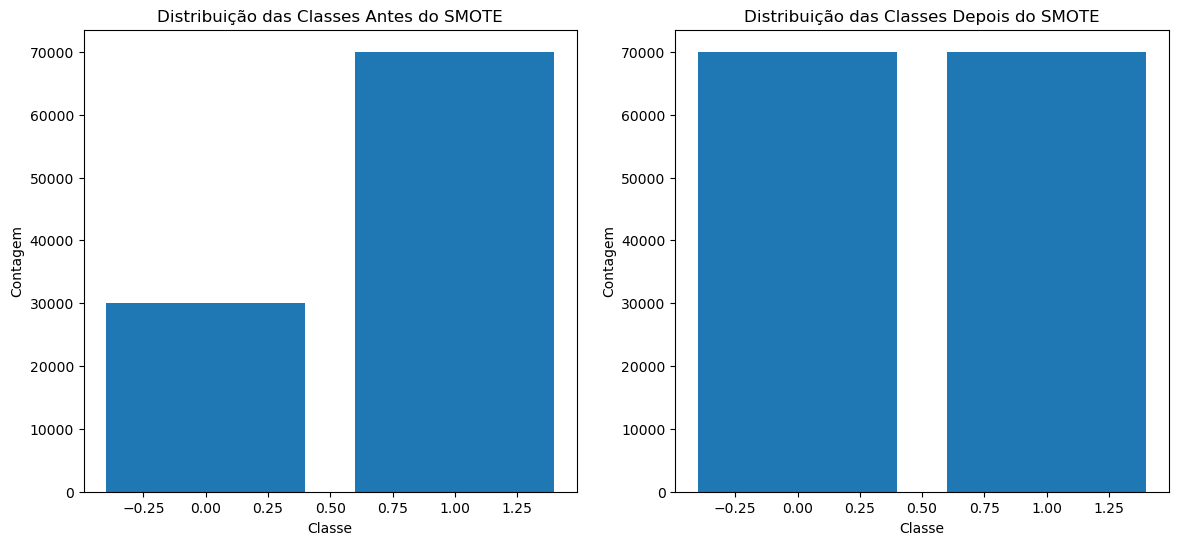

In [ ]:
# Carregar o DataFrame
merged_df = pd.read_csv('merged_df.csv', header=0).sample(100000)

# Identificar colunas categóricas
categorical_columns = merged_df.select_dtypes(include=['object', 'category']).columns

# Aplicar Ordinal Encoding nas colunas categóricas
encoder = OrdinalEncoder()
merged_df[categorical_columns] = encoder.fit_transform(merged_df[categorical_columns])

# Imputação usando KNN
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed
merged_df_imputed = pd.DataFrame(imputer.fit_transform(merged_df), columns=merged_df.columns)

# Verificar a distribuição das classes antes do SMOTE
y = merged_df_imputed['score']
print(y.value_counts(normalize=True))

# Plotando a distribuição das classes antes do SMOTE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(y.value_counts().index, y.value_counts().values)
ax[0].set_title('Distribuição das Classes Antes do SMOTE')
ax[0].set_xlabel('Classe')
ax[0].set_ylabel('Contagem')

# Aplicar SMOTE
X = merged_df_imputed.drop(columns=['score'])
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Plotando a distribuição das classes depois do SMOTE
ax[1].bar(y_res.value_counts().index, y_res.value_counts().values)
ax[1].set_title('Distribuição das Classes Depois do SMOTE')
ax[1].set_xlabel('Classe')
ax[1].set_ylabel('Contagem')

# Salvando o DataFrame após o balanceamento
balanced_df = X_res.copy()
balanced_df['score'] = y_res
balanced_df.to_csv('balanced_df.csv', index=False)

plt.show()
del merged_df

## D) Dois classificadores iniciais

In [ ]:
X = pd.read_csv('balanced_df.csv')
X_cls = X.copy().drop(columns=['review_score', 'score'])

# Dicionário de pipelines de classificação
pipelines_classificacao = {
    'KNeighborsClassifier': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
    'RandomForestClassifier': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]),
}

# Definição dos grids de hiperparâmetros para cada modelo
parametros_grid_classificacao = {
    'RandomForestClassifier': {'classifier__n_estimators': [50, 100]},
    'KNeighborsClassifier': {'classifier__n_neighbors': [3, 5]},
}

# Adicionando GridSearchCV aos pipelines
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

resultados_grid_search = {}  # Dicionário para armazenar os resultados do GridSearchCV

# Avaliação dos modelos com métricas de precisão, recall e f1-score
resultados_avaliacao = []

for nome_modelo, pipeline in pipelines_classificacao.items():
    print(f"Modelo de Classificação: {nome_modelo}")
    
    # Lista para armazenar os resultados de cada fold
    resultados_fold = []
    
    for fold, (train_index, val_index) in enumerate(skf.split(X_cls, y)):
        X_train, X_val = X_cls.iloc[train_index], X_cls.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Criando e treinando o modelo
        grid_search = GridSearchCV(pipeline, param_grid=parametros_grid_classificacao[nome_modelo], cv=skf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Avaliando o modelo no conjunto de validação
        y_pred = grid_search.best_estimator_.predict(X_val)
        
        acuracia = accuracy_score(y_val, y_pred)
        precisao = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')
        
        resultados_fold.append({
            'Fold': fold,
            'Acurácia': acuracia,
            'Precisão': precisao,
            'Recall': recall,
            'F1-Score': f1
        })
    
    # Calculando média dos resultados de todos os folds
    media_acuracia = np.median([resultado['Acurácia'] for resultado in resultados_fold])
    media_precisao = np.median([resultado['Precisão'] for resultado in resultados_fold])
    media_recall = np.median([resultado['Recall'] for resultado in resultados_fold])
    media_f1 = np.median([resultado['F1-Score'] for resultado in resultados_fold])
    
    # Armazenando os resultados médios
    resultados_avaliacao.append({
        'Modelo': nome_modelo,
        'Acurácia Média': media_acuracia,
        'Precisão Média': media_precisao,
        'Recall Médio': media_recall,
        'F1-Score Médio': media_f1
    })
    
    print(f'Acurácia Média - {media_acuracia}, Precisão Média - {media_precisao}, Recall Médio - {media_recall}, F1-Score Médio - {media_f1}')

# Criando DataFrame com os resultados de avaliação
df_resultados_avaliacao = pd.DataFrame(resultados_avaliacao)
df_resultados_avaliacao.to_csv('resultados_cls_inicial.csv', index=False)

Modelo de Classificação: KNeighborsClassifier
Acurácia Média - 0.87905, Precisão Média - 0.8775569375348868, Recall Médio - 0.87905, F1-Score Médio - 0.878007102303716
Modelo de Classificação: RandomForestClassifier
Acurácia Média - 0.9484, Precisão Média - 0.9502223100692437, Recall Médio - 0.9484, F1-Score Médio - 0.9472176269199936


## E) K Means

c:\Users\andre\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Centros dos Clusters:
    payment_value  freight_value        volume          dis  product_weight_g  \
0     296.193293      25.255631  33590.497653   483.518020       3618.002669   
1     118.473584      14.139486   8927.702486   407.523124        835.705841   
2     119.718166      13.519757   6892.603552   309.066522        656.721548   
3     461.046254      15.720349  10365.644852   460.057559       1120.321826   
4     176.271889      21.619300   8102.936277  1042.897594        843.865411   

      recency  
0 -291.854722  
1 -470.763751  
2 -201.308358  
3 -277.492786  
4 -260.008764  


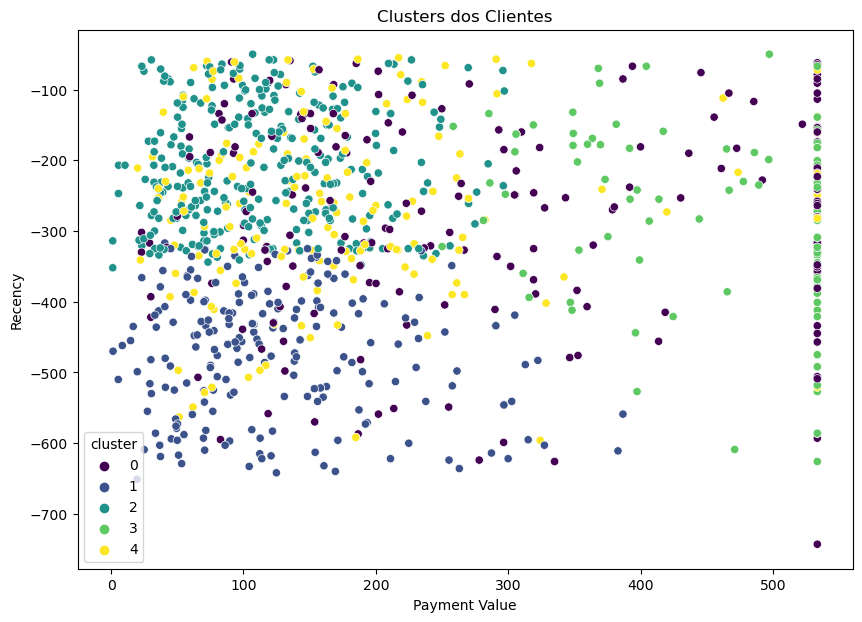

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

X = pd.read_csv('balanced_df.csv')
attributes = ['review_scosre', 'payment_value', 'payment_installments', 'recency']
X = X[attributes]

# Normalizando os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Aplicando o algoritmo K-Means com k=5
kmeans = KMeans(n_clusters=5, random_state=42)
X['cluster'] = kmeans.fit_predict(scaled_data)

# Mostrando os centros dos clusters
centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
cluster_centers = pd.DataFrame(centers, columns=attributes)
print("Centros dos Clusters:\n", cluster_centers)

# Visualização dos clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='payment_value', y='recency', hue='cluster', data=X.sample(1000), palette='viridis')
plt.title('Clusters dos Clientes')
plt.xlabel('Payment Value')
plt.ylabel('Recency')
plt.show()

## F) Tratando outliers

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X = pd.read_csv('balanced_df.csv')

# Função para calcular os limites da cerca superior e inferior
def calcula_cerca(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calcular o volume do produto e tratar os valores ausentes e outliers
X['volume'] = (X['product_length_cm'] * 
                       X['product_width_cm'] * 
                       X['product_height_cm']).replace(0, np.nan)

# Lista de colunas com muitos outliers
columns_with_outliers = ['payment_value', 'freight_value', 'volume', 'dis', 'product_weight_g']

# Calcula os limites para cada coluna e substitui os valores ausentes pela cerca superior
for column in columns_with_outliers:
    lower_bound, upper_bound = calcula_cerca(X[column])
    X[column].fillna(upper_bound, inplace=True)
    
    # Substituir valores abaixo da cerca inferior pela cerca inferior
    X.loc[X[column] < lower_bound, column] = lower_bound
    
    # Substituir valores acima da cerca superior pela cerca superior
    X.loc[X[column] > upper_bound, column] = upper_bound

# Calcula os limites para volume e substitui os valores ausentes pela cerca superior
volume_lower_bound, volume_upper_bound = calcula_cerca(X['volume'])

# Substituir valores ausentes pela cerca superior
X['volume'].fillna(volume_upper_bound, inplace=True)

# Substituir valores abaixo da cerca inferior pela cerca inferior
X.loc[X['volume'] < volume_lower_bound, 'volume'] = volume_lower_bound

# Substituir valores acima da cerca superior pela cerca superior
X.loc[X['volume'] > volume_upper_bound, 'volume'] = volume_upper_bound
X.to_csv('merged_df_filtrado.csv', index=False)

# Exibir as contagens de valores ausentes após substituição
X.isna().sum()

Unnamed: 0                    0
review_score                  0
order_status                  0
ship-time                     0
delay-time                    0
approval_time                 0
recency                       0
dis                           0
customer_state                0
price                         0
freight_value                 0
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
delivery_time                 0
score                         0
volume                        0
dtype: int64

## G) Escolhendo features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X = pd.read_csv('merged_df_filtrado.csv')
y = X['score']
X = X.drop(columns=['score', 'review_score'])
model = RandomForestRegressor()
features = X.columns
model.fit(X, y)

# Extrair importâncias das características
feature_importances = model.feature_importances_

# Criar DataFrame com as importâncias das características
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

# Selecionar as características mais importantes
num_top_features = 12
top_features = sorted_feature_importance['Feature'].iloc[:num_top_features]
X = X[top_features]
top_features

0                   review_score
12          payment_installments
21                 delivery_time
20              product_width_cm
19             product_height_cm
18             product_length_cm
17              product_weight_g
16            product_photos_qty
15    product_description_lenght
14           product_name_lenght
13                 payment_value
11                  payment_type
Name: Feature, dtype: object

![image.png](attachment:c91d4fd2-9bd7-4d44-a2fd-5907f1d53175.png)

Aqui mostramos que, segundo o random forest, as features mais valiosas que serão utilizadas são:
- 1. payment_value
- 2. price
- 3. freight_value
- 4. product_description_length
- 5. product_weight_g
- 6. delivery_time
- 7. product_name_length
- 8. product_height_cm
- 9. product_length_cm
- 10. product_width_cm
- 11. order_status_delivered
- 12. payment_installments

## H) Modelos


### Implementação
A implementação foi realizada utilizando a biblioteca scikit-learn, frequentemente abreviada como sklearn. O scikit-learn é uma biblioteca de código aberto em Python que oferece uma ampla variedade de ferramentas para aprendizado de máquina, incluindo algoritmos de regressão, classificação, clustering, pré-processamento de dados e muito mais.

No código fornecido, foram utilizadas várias classes e métodos fornecidos pelo scikit-learn:

1. **Pipeline**: Esta classe é usada para encadear várias etapas de processamento de dados juntas. Cada etapa pode incluir transformações de dados (como normalização, redução de dimensionalidade) e um modelo de aprendizado de máquina. Isso permite que todo o pipeline seja tratado como um único estimador.

2. **GridSearchCV**: Esta classe é usada para realizar uma pesquisa exaustiva sobre uma grade de valores de hiperparâmetros especificados para um estimador. Isso é útil para encontrar os melhores hiperparâmetros para um determinado modelo.

3. **Regressores e Classificadores**: Foram utilizados vários modelos de regressão e classificação fornecidos pelo scikit-learn, como `HistGradientBoostingRegressor`, `AdaBoostRegressor`, `RandomForestRegressor`, `SVR`, `KNeighborsRegressor`, `SVC`, `DecisionTreeClassifier`, `RandomForestClassifier`, `KNeighborsClassifier` e `GaussianNB`.

4. **Pré-processamento de dados**: Foram utilizados os métodos de pré-processamento de dados fornecidos pelo scikit-learn, como `SimpleIputer` e o `StandardScaler` para normalização e preenchimento de valores nulos. Também foram escolhidas as melhores features conforme sua importância em um Random Forest.

A implementação segue uma abordagem sistemática de pré-processamento de dados, divisão em conjuntos de treinamento e teste, criação de pipelines para encadear pré-processamento e modelos, realização de busca em grade para encontrar os melhores hiperparâmetros e avaliação do desempenho dos modelos utilizando métricas adequadas (MSE para regressão e acurácia para classificação).



- **GaussianNB**:
    - O GaussianNB é um classificador de Naive Bayes que assume que as características são independentes e têm distribuição gaussiana (normal). Ele calcula a probabilidade de pertencer a uma classe com base nas probabilidades condicionais das características dadas as classes usando o teorema de Bayes.
    
    
- **HistGradientBoostingRegressor**:
    - O HistGradientBoostingRegressor é um regressor baseado em gradient boosting que utiliza histogramas para acelerar o processo de aprendizado. Ele constrói uma série de modelos de árvore de decisão em que cada modelo corrige os erros dos modelos anteriores na série, resultando em uma previsão final que é uma combinação ponderada das previsões individuais das árvores.

- **AdaBoostRegressor**:
    - O AdaBoostRegressor é um regressor baseado em boosting que constrói uma série de modelos de regressão simples (geralmente árvores de decisão rasas) em que cada modelo é treinado em uma versão ponderada dos dados, onde as instâncias mal previstas recebem pesos maiores. O resultado final é uma combinação ponderada das previsões individuais dos modelos.

- **RandomForestRegressor**:
    - O RandomForestRegressor é uma extensão do RandomForestClassifier para tarefas de regressão. Ele constrói várias árvores de decisão durante o treinamento e combina seus resultados para prever valores numéricos. Cada árvore é treinada em uma amostra aleatória dos dados e faz previsões independentes.

- **SVR (Support Vector Regressor)**:
    - O SVR é um regressor que encontra o hiperplano que melhor se ajusta aos dados no espaço de características. Ele busca encontrar a margem máxima entre os pontos de dados, enquanto mantém os erros de regressão dentro de uma margem especificada.

- **KNeighborsRegressor**:
    - O KNeighborsRegressor é um regressor baseado em instâncias que calcula o valor de um ponto de dados desconhecido com base nos valores dos pontos mais próximos (vizinhos) no espaço de características. O valor do ponto desconhecido é determinado pela média dos valores de seus vizinhos mais próximos.

- **GaussianNB** (na tarefa de regressão):
    - Embora o GaussianNB seja geralmente utilizado para tarefas de classificação, também pode ser adaptado para tarefas de regressão, assumindo que as características têm distribuição gaussiana (normal). Nesse caso, ele estima a média e o desvio padrão de cada classe e usa essas estimativas para prever valores numéricos.


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

In [ ]:
# Dicionário de pipelines de classificação
pipelines_classificacao = {
    'XGBClassifier': Pipeline([('classifier', XGBClassifier())]),
    'MLPClassifier': Pipeline([('classifier', MLPClassifier(max_iter=1000, solver='adam'))])
}

# Definição dos grids de hiperparâmetros para cada modelo
parametros_grid_classificacao = {
    'XGBClassifier': {'classifier__learning_rate': [0.1, 0.01]},
    'MLPClassifier': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  
        'classifier__learning_rate_init': [0.001, 0.01],  
        'classifier__momentum': [0.9, 0.95],
        'classifier__activation': ['relu', 'logistic'],  
        'classifier__solver': ['adam'],  
        'classifier__n_iter_no_change': [10],  
        'classifier__early_stopping': [True],
    }
}

# Adicionando GridSearchCV aos pipelines
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

resultados_grid_search = {}  # Dicionário para armazenar os resultados do GridSearchCV

# Avaliação dos modelos com métricas de precisão, recall e f1-score
resultados_avaliacao = []

for nome_modelo, pipeline in pipelines_classificacao.items():
    print(f"Modelo de Classificação: {nome_modelo}")
    
    # Lista para armazenar os resultados de cada fold
    resultados_fold = []
    
    for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Criando e treinando o modelo
        grid_search = GridSearchCV(pipeline, param_grid=parametros_grid_classificacao[nome_modelo], cv=skf, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Avaliando o modelo no conjunto de validação
        y_pred = grid_search.best_estimator_.predict(X_val)
        
        acuracia = accuracy_score(y_val, y_pred)
        precisao = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')
        
        resultados_fold.append({
            'Fold': fold,
            'Acurácia': acuracia,
            'Precisão': precisao,
            'Recall': recall,
            'F1-Score': f1
        })
    
    # Calculando média dos resultados de todos os folds
    media_acuracia = np.median([resultado['Acurácia'] for resultado in resultados_fold])
    media_precisao = np.median([resultado['Precisão'] for resultado in resultados_fold])
    media_recall = np.median([resultado['Recall'] for resultado in resultados_fold])
    media_f1 = np.median([resultado['F1-Score'] for resultado in resultados_fold])
    
    # Armazenando os resultados médios
    resultados_avaliacao.append({
        'Modelo': nome_modelo,
        'Acurácia Média': media_acuracia,
        'Precisão Média': media_precisao,
        'Recall Médio': media_recall,
        'F1-Score Médio': media_f1
    })
    
    print(f'Acurácia Média - {media_acuracia}, Precisão Média - {media_precisao}, Recall Médio - {media_recall}, F1-Score Médio - {media_f1}')

# Criando DataFrame com os resultados de avaliação
df_resultados_avaliacao = pd.DataFrame(resultados_avaliacao)
df_resultados_avaliacao.to_csv('resultados_avaliacao_classificacao.csv', index=False)

Modelo de Classificação: XGBClassifier
Acurácia Média - 1.0, Precisão Média - 1.0, Recall Médio - 1.0, F1-Score Médio - 1.0
Modelo de Classificação: MLPClassifier


## I) PLN - Classificação de Emoções

Estamos utilizando o modelo de classificação BERT pré-treinado para analisar o sentimento de comentários em português das reviews. Primeiro, importamos a biblioteca Transformers, necessária para trabalhar com modelos BERT, e carregamos o conjunto de dados que contém as revisões de pedidos da Olist. Em seguida, definimos o nome do modelo pré-treinado em português e inicializamos o tokenizador e o modelo em si. A função classify_reviews é criada para classificar os comentários. Dentro dela, os comentários são tokenizados usando o tokenizador BERT, e o modelo é usado para prever os rótulos de sentimento para cada comentário. Os rótulos previstos são então mapeados para as categorias "positivo" ou "negativo". Finalmente, os rótulos de sentimento são adicionados ao DataFrame olist_order_reviews, que é então exibido, mostrando os comentários e suas classificações de sentimento correspondentes. Em resumo, o código automatiza a tarefa de análise de sentimento em português para os comentários do conjunto de dados da Olist usando um modelo BERT pré-treinado.


In [ ]:
!pip install transformers --quiet

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch
import pandas as pd

raw_path = '../input/brazilian-ecommerce/'
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_order_reviews.dropna(subset=['review_comment_message'], inplace=True)
model_name = "neuralmind/bert-base-portuguese-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Function to classify reviews in batches
def classify_reviews_in_batches(reviews, tokenizer, model, batch_size=32):
    num_batches = (len(reviews) + batch_size - 1) // batch_size
    sentiment_labels = []
    for i in range(num_batches):
        batch_reviews = reviews[i * batch_size : (i + 1) * batch_size]
        inputs = tokenizer(batch_reviews, padding=True, truncation=True, return_tensors="pt", max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        predicted_labels = torch.argmax(outputs.logits, dim=1).tolist()
        batch_sentiment_labels = ["negativo" if label == 0 else "positivo" for label in predicted_labels]
        sentiment_labels.extend(batch_sentiment_labels)
    return sentiment_labels

# Define batch size
batch_size = 32
olist_order_reviews = olist_order_reviews.loc[0:1000,:]
# Process reviews in batches
num_reviews = len(olist_order_reviews)
sentiments = []
for i in range(0, num_reviews, batch_size):
    batch_reviews = olist_order_reviews['review_comment_message'][i:i+batch_size].tolist()
    batch_sentiments = classify_reviews_in_batches(batch_reviews, tokenizer, model, batch_size=batch_size)
    sentiments.extend(batch_sentiments)

# Assign sentiment labels to the dataframe
olist_order_reviews['sentiment'] = sentiments

**Exemplo Positivo**

In [ ]:
print('Review:')
print(olist_order_reviews['review_comment_message'][3])
print('\nResultado:')
print(olist_order_reviews['sentiment'][3])

**Exemplo Negativo**

In [ ]:
print('Review:')
print(olist_order_reviews['review_comment_message'][170])
print('\nResultado:')
print(olist_order_reviews['sentiment'][170])

# IV - Experimentos


## A) Experimentos realizados
Como mostrado abaixo, temos os seguintes modelos e métricas  


Regression Model: HistGradientBoostingRegressor  
Best Parameters - {'regressor__learning_rate': 0.01}, Best Negative MSE - 2.249994459397313  


Regression Model: AdaBoostRegressor  
Best Parameters - {'regressor__n_estimators': 100}, Best Negative MSE - 2.2504098933384826  


Regression Model: RandomForestRegressor  
Best Parameters - {'regressor__n_estimators': 200}, Best Negative MSE - 2.456331089209416  


Regression Model: KNeighborsRegressor  
Best Parameters - {'regressor__n_neighbors': 5}, Best Negative MSE - 3.903084480001983  

In [ ]:
regression_df

## B) Resultados
O melhor modelo de regressão foi o `RandomForestRegressor`, que obteve RMSE de 2.45754, conseguindo prever o Review Score que o usuário dária com um sucesso relativamente grande.

# V - Conclusão

O estudo exploratório dos dados do comércio eletrônico no Brasil, utilizando o conjunto de dados fornecido pela Olist Store, revelou insights valiosos sobre o comportamento do consumidor, as tendências de mercado e os desafios enfrentados pelas empresas no setor. A análise abordou diversas áreas, desde a influência da localização do cliente na satisfação e tempo de entrega até a predição de vendas futuras e a classificação de emoções em comentários de clientes.

Ao investigar a influência da localização do cliente, foi observado que regiões geográficas específicas podem estar associadas a diferentes níveis de satisfação do cliente e tempos de entrega. Por exemplo, clientes em áreas metropolitanas como São Paulo e Rio de Janeiro podem ter expectativas e experiências diferentes em comparação com áreas rurais.

Além disso, a análise da satisfação do cliente em relação aos tipos de produtos revelou que certas categorias, como moda e alimentos/bebidas, tendem a gerar mais satisfação, enquanto outras, como PCs gamers e seguros, podem resultar em menor satisfação. Essas descobertas são cruciais para orientar estratégias de marketing e gestão de produtos.

A predição de vendas futuras foi abordada utilizando técnicas de aprendizado de máquina, como o HistGradientBoostingRegressor e o RandomForestRegressor. Esses modelos fornecem uma base sólida para prever a demanda futura com base em dados históricos de vendas, permitindo uma melhor gestão de estoque e planejamento estratégico.

Por fim, a análise de sentimentos em comentários de clientes foi realizada usando um modelo BERT pré-treinado para classificação de emoções. Isso oferece às empresas uma ferramenta poderosa para entender a opinião dos clientes em relação aos produtos e serviços, permitindo a identificação rápida de problemas e áreas de melhoria.

Em suma, este estudo demonstra o potencial dos dados do comércio eletrônico brasileiro para fornecer insights acionáveis para empresas do setor. A combinação de análise de dados e técnicas de aprendizado de máquina pode ser uma ferramenta poderosa para impulsionar a inovação, melhorar a satisfação do cliente e impulsionar o sucesso no mercado de e-commerce.


# VI - Referências

https://soar.suny.edu/handle/20.500.12648/1652

https://gsarpublishers.com/wp-content/uploads/2024/01/GSARJEBM012024-Gelary-script.pdf

https://www.sciencedirect.com/science/article/pii/S0141933122002101?ref=pdf_download&fr=RR-2&rr=8645c58c481102e5